In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', labelsize=16)    # fontsize of the x and y labels

# Data

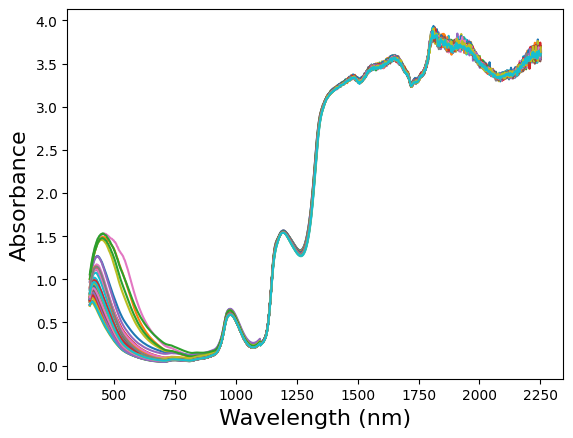

In [2]:
grid = np.linspace(400, 2252, 926)

data_train = pd.read_csv('Data/beer_spectra.csv', header=None).values[:,:-1]
data_test = pd.read_csv('Data/beer_spectra_test.csv', header=None).values[:,:-1]

x_concat = np.vstack((data_train, data_test))

plt.figure()
plt.plot(grid, x_concat.T)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.savefig('figure_1.eps', format='eps')

## Feature importance

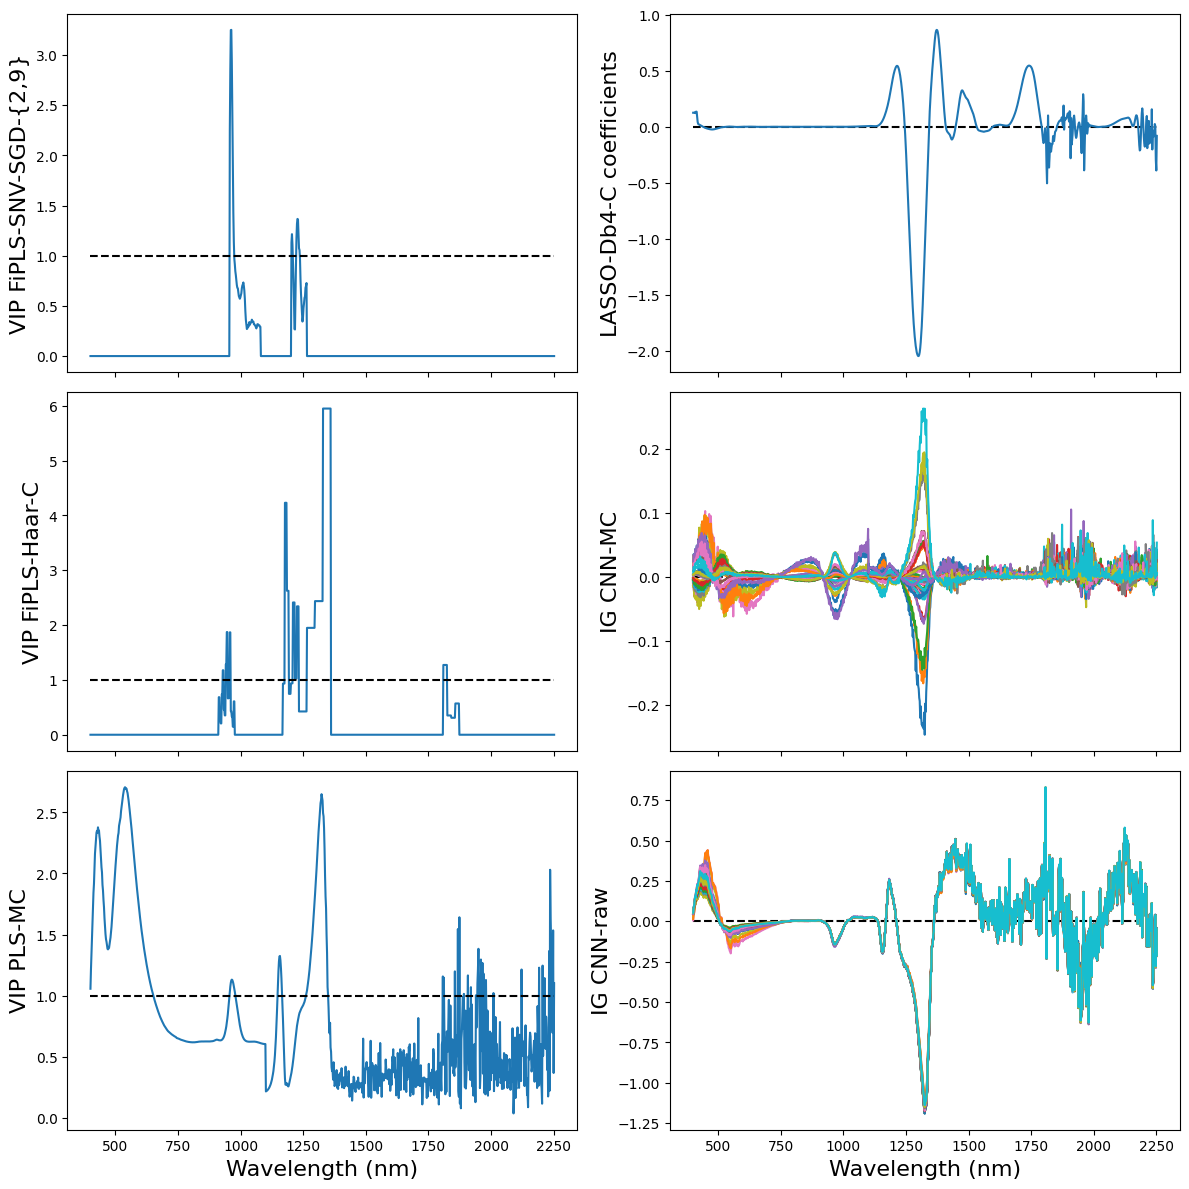

In [3]:
file_names = ['VIP_FiPLS_SNV-SGD-2-9', 'VIP_FiPLS_wav_Haar', 'VIP_PLS_MC', 'LASSO_coefficients', 'ig_cnn_MC',  'ig_cnn_raw']

ylabel_list = ['VIP FiPLS-SNV-SGD-{2,9}', 'VIP FiPLS-Haar-C', 'VIP PLS-MC', 
'LASSO-Db4-C coefficients', 'IG CNN-MC',  'IG CNN-raw'
            ]

# cycle through pps
fig, axs = plt.subplots(3, 2, figsize=(12,12), sharex=True)
for i, name in enumerate(file_names):
    file_name = 'interpretability/' + name + '_beer.csv'
    data = pd.read_csv(file_name, header=None).values
    if name in ['LASSO_coefficients', 'ig_cnn_MC',  'ig_cnn_raw']:
        axs[i-3, 1].set_ylabel(ylabel_list[i])
        axs[i-3, 1].hlines(0, grid[0], grid[-1], linestyle='--', color='k')    
        if name in ['ig_cnn_MC',  'ig_cnn_raw']:
            axs[i-3, 1].plot(grid, data.T)
        else:
            axs[i-3, 1].plot(grid,  data[:,1].T)
    else:
        axs[i, 0].set_ylabel(ylabel_list[i])
        axs[i, 0].plot(grid,  data[:,1].T)
        axs[i, 0].hlines(1, grid[0], grid[-1], linestyle='--', color='k')
axs[2,0].set_xlabel('Wavelength (nm)')
axs[2,1].set_xlabel('Wavelength (nm)')
fig.tight_layout()
fig.savefig('figure_8.eps', format='eps')

Comparison between different xAI methods

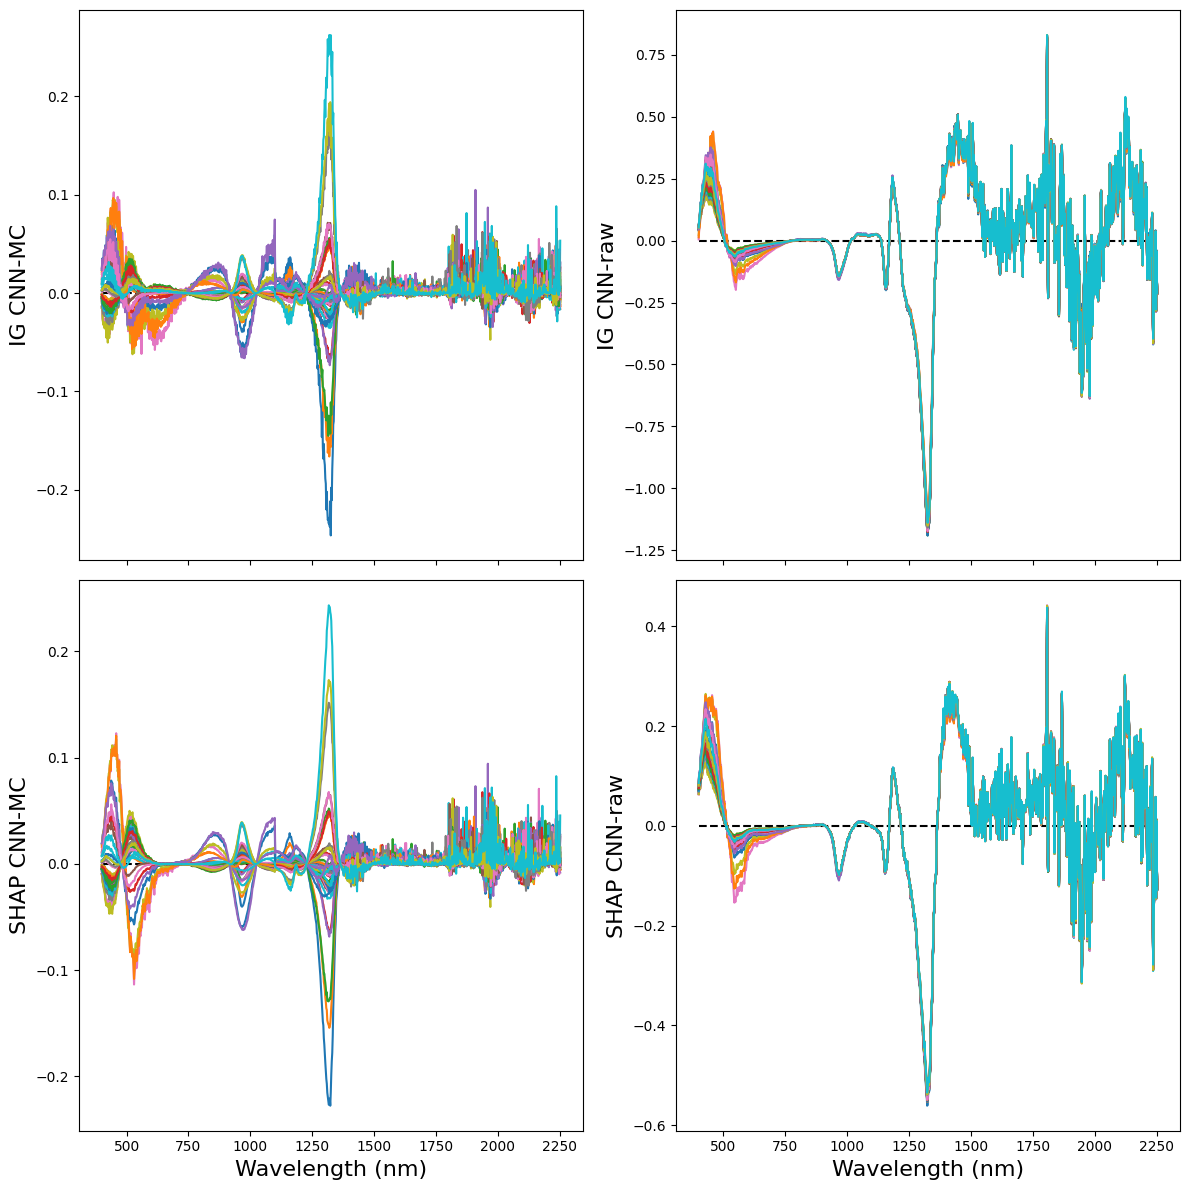

In [4]:
file_names = ['ig_cnn_MC',  'shap_cnn_MC', 'ig_cnn_raw', 'shap_cnn_raw']
ylabel_list = ['IG CNN-MC', 'SHAP CNN-MC', 'IG CNN-raw', 'SHAP CNN-raw']

# cycle through pps
fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex=True)
for i, name in enumerate(file_names):
    file_name = 'interpretability/' + name + '_beer.csv'
    data = pd.read_csv(file_name, header=None).values
    if name in ['ig_cnn_raw',  'occ_cnn_raw', 'shap_cnn_raw']:
        axs[i-2, 1].set_ylabel(ylabel_list[i])
        axs[i-2, 1].hlines(0, grid[0], grid[-1], linestyle='--', color='k')    
        axs[i-2, 1].plot(grid, data.T)
    else:
        axs[i-2, 0].set_ylabel(ylabel_list[i])
        axs[i-2, 0].hlines(0, grid[0], grid[-1], linestyle='--', color='k')    
        axs[i-2,0].plot(grid, data.T)
axs[1,0].set_xlabel('Wavelength (nm)')
axs[1,1].set_xlabel('Wavelength (nm)')
fig.tight_layout()